In [17]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import pearsonr, spearmanr 
from scipy import stats

from regprepare import get_auto_mpg, train_val_test

In [2]:
df = get_auto_mpg()

df.head()

,mpg,cylinders,displ,horsepower,weight,acc,model_year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,"""chevrolet chevelle malibu"""
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,"""buick skylark 320"""
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,"""plymouth satellite"""
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,"""amc rebel sst"""
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,"""ford torino"""


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   mpg         392 non-null    float64
 1   cylinders   392 non-null    int64  
 2   displ       392 non-null    float64
 3   horsepower  392 non-null    float64
 4   weight      392 non-null    float64
 5   acc         392 non-null    float64
 6   model_year  392 non-null    int64  
 7   origin      392 non-null    int64  
 8   name        392 non-null    object 
dtypes: float64(5), int64(3), object(1)
memory usage: 30.6+ KB


## Univariate Distributions

**continous variable distribution**
 - plt.hist
 - sns.displot
 - sns.boxplot

In [4]:
cont_var = ['mpg', 'displ', 'horsepower', 'weight', 'acc']

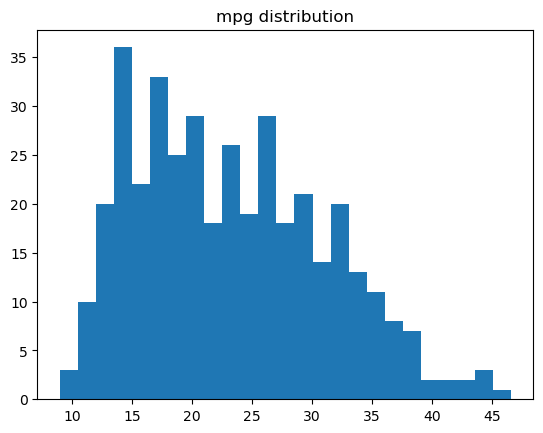

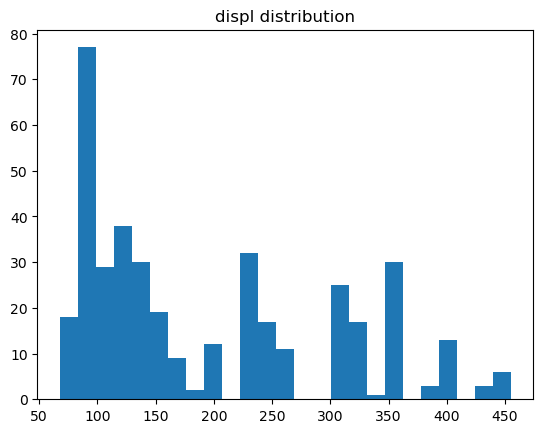

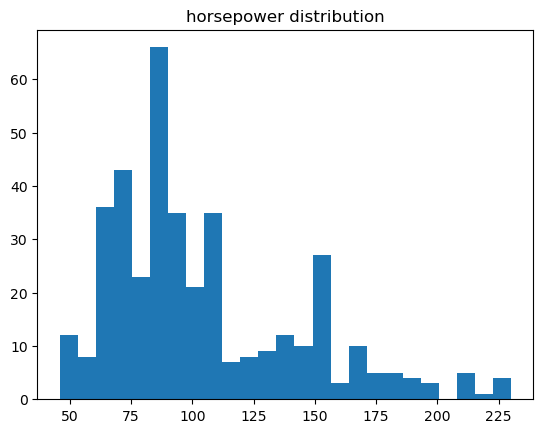

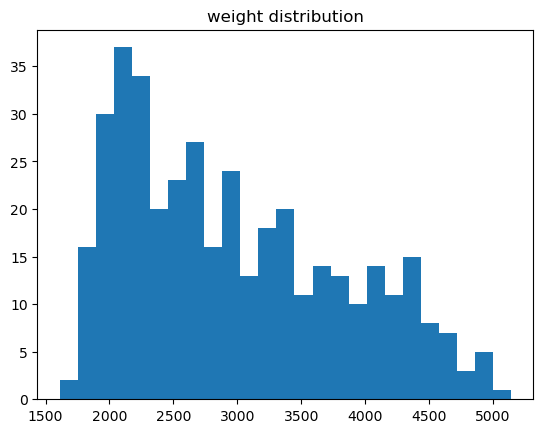

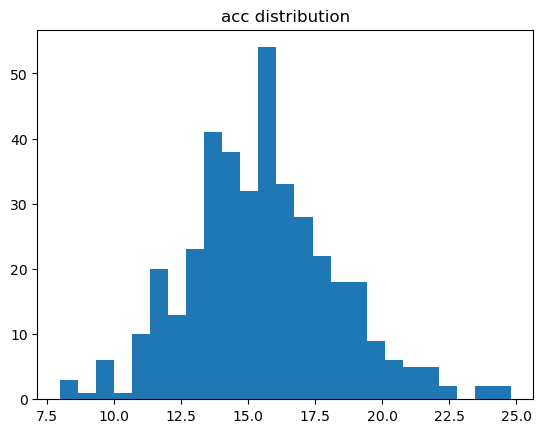

In [5]:
for col in cont_var:
    
    plt.hist(df[col], bins =25)
    plt.title(f'{col} distribution')
    plt.show()

**Takeaways**

Accleration and mpg are normally distributed. <br>
Displacement, horsepower, and weight are not normally distributed

### Discrete variable distribution 

 - sns.countplot

In [6]:
df['name'].nunique()

301

In [7]:
df['model_year'].nunique(), df['origin'].nunique()

(13, 3)

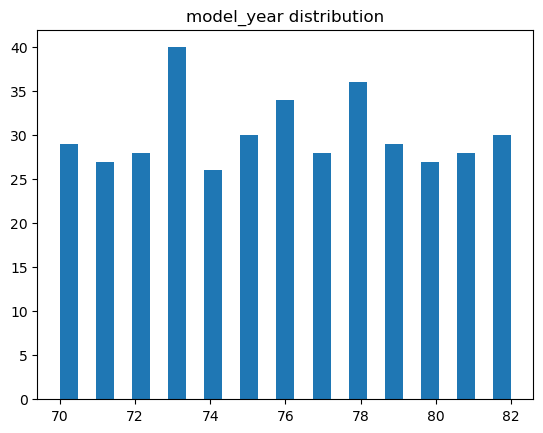

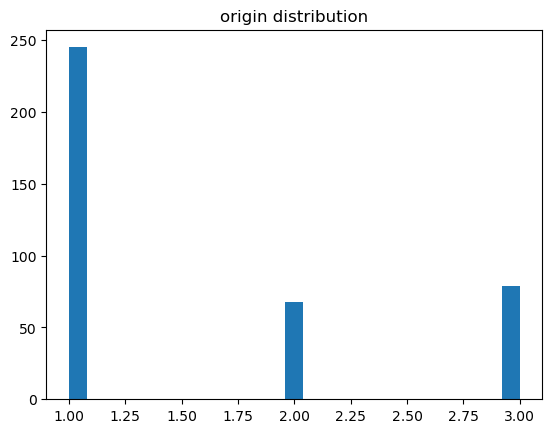

In [8]:
for col in ['model_year', 'origin']:
    
    plt.hist(df[col], bins = 25)
    plt.title(f'{col} distribution')
    plt.show()          

**Takeaways**

Model year is a uniform distriution from years 1970-1982.

The origin distribution is skewed, wth many cars coming from orign 1.

## Bivariate Distributions

 **Continuous with continuous**
 
 - sns.pairplot
 - sns.relplot
 - sns.lmplot
 - sns.jointplot
 - sns.heatmap
 

In [9]:
train, validate, test = train_val_test(df)
train.shape, validate.shape, test.shape

((235, 9), (78, 9), (79, 9))

In [10]:
train_corr = df[cont_var].corr(method = 'spearman')

<AxesSubplot:>

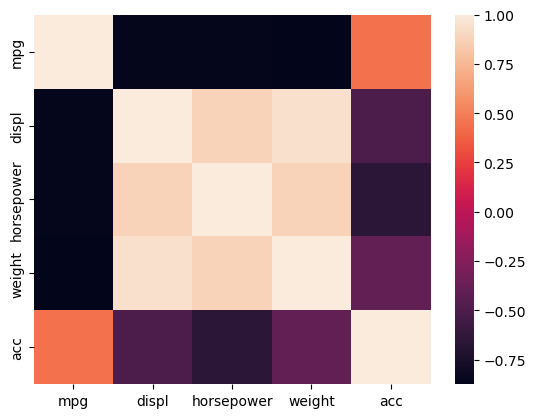

In [11]:
sns.heatmap(train_corr)

**Takeaways**

Displacememt, horsepower, and weight all show a strong negative correlation with mpg.

Acceleration and mpg have a moderate positive correlation.

There is a strong correlation between displacement, horsepower, and weight. 

There is a moderate negative correlation between acceleration and (displacement, horsepower, and weight).

It would be important to compare the spearmanr results between (displacement, horsepower, and weight) and mpg to see which feature has the best correlation with the target variable (mpg).

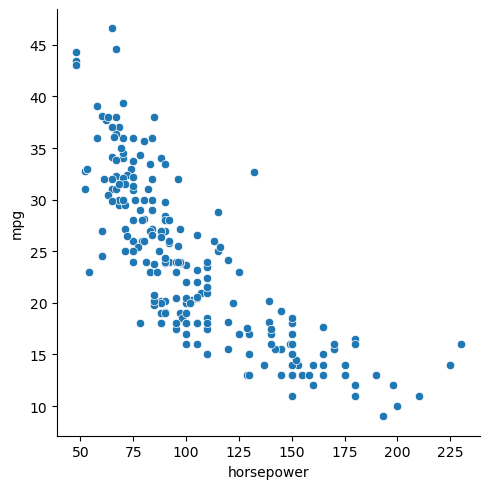

In [12]:
sns.relplot(x = 'horsepower', y = 'mpg', data = train)

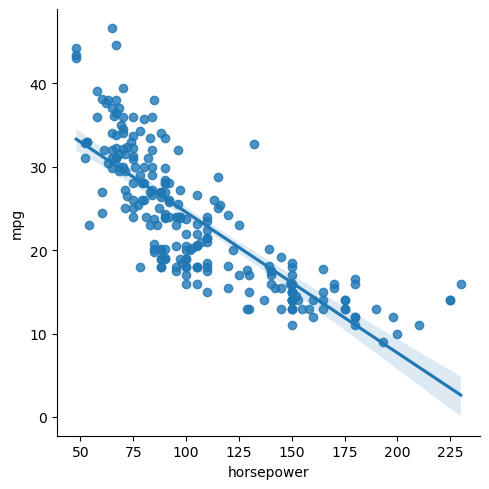

In [13]:
sns.lmplot(x = 'horsepower', y = 'mpg', data = train)

**Takeaways**

There is a strong negative correlation between horsepower and mpg, but it is clearly not linear!

**Discrete with continuous**

 - sns.swarmplot
 - sns.stripplot
 - sns.boxplot
 - sns.violinplot
 - sns.barplot

<AxesSubplot:xlabel='origin', ylabel='mpg'>

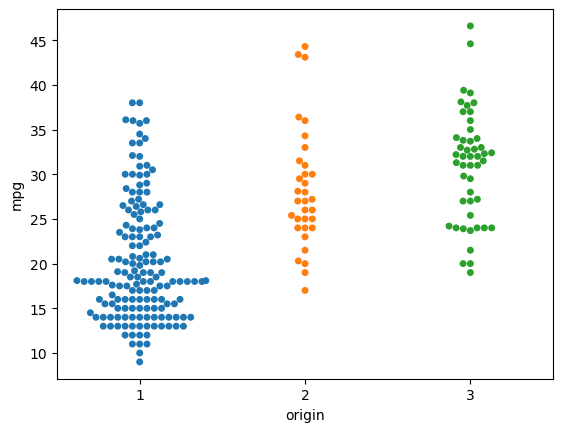

In [14]:
sns.swarmplot(x='origin', y = 'mpg', data = train)

**Takeaways**

Origin 1 appears to make cars with lower mpg. I would use a one-sample t-test to compare the mpg of origin 1 cars to the  <br> overall mean in the train dataset.

$H_0$: The mpg for the origin 1 cars is >= to the overall average mpg. (greater than or equal)

$H_a$: The mpg for origin 1 cars is < the overall average. (less than)

In [18]:
t, p = stats.ttest_1samp(train[train['origin'] == 1]['mpg'], train['mpg'].mean())
t, p

(-6.187826120031006, 5.335898074820472e-09)

In [19]:
𝜶 = 0.05

if t < 0 and p/2 < 𝜶:
    print('Reject the null hypothesis')
else:
    print('We fail to reject null hypothesis')

Reject the null hypothesis


In [20]:
train['mpg'].mean()

23.503829787234046

**Discrete with discrete**

 - pd.crosstab, passed into sns.heatmap